<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [4]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [5]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


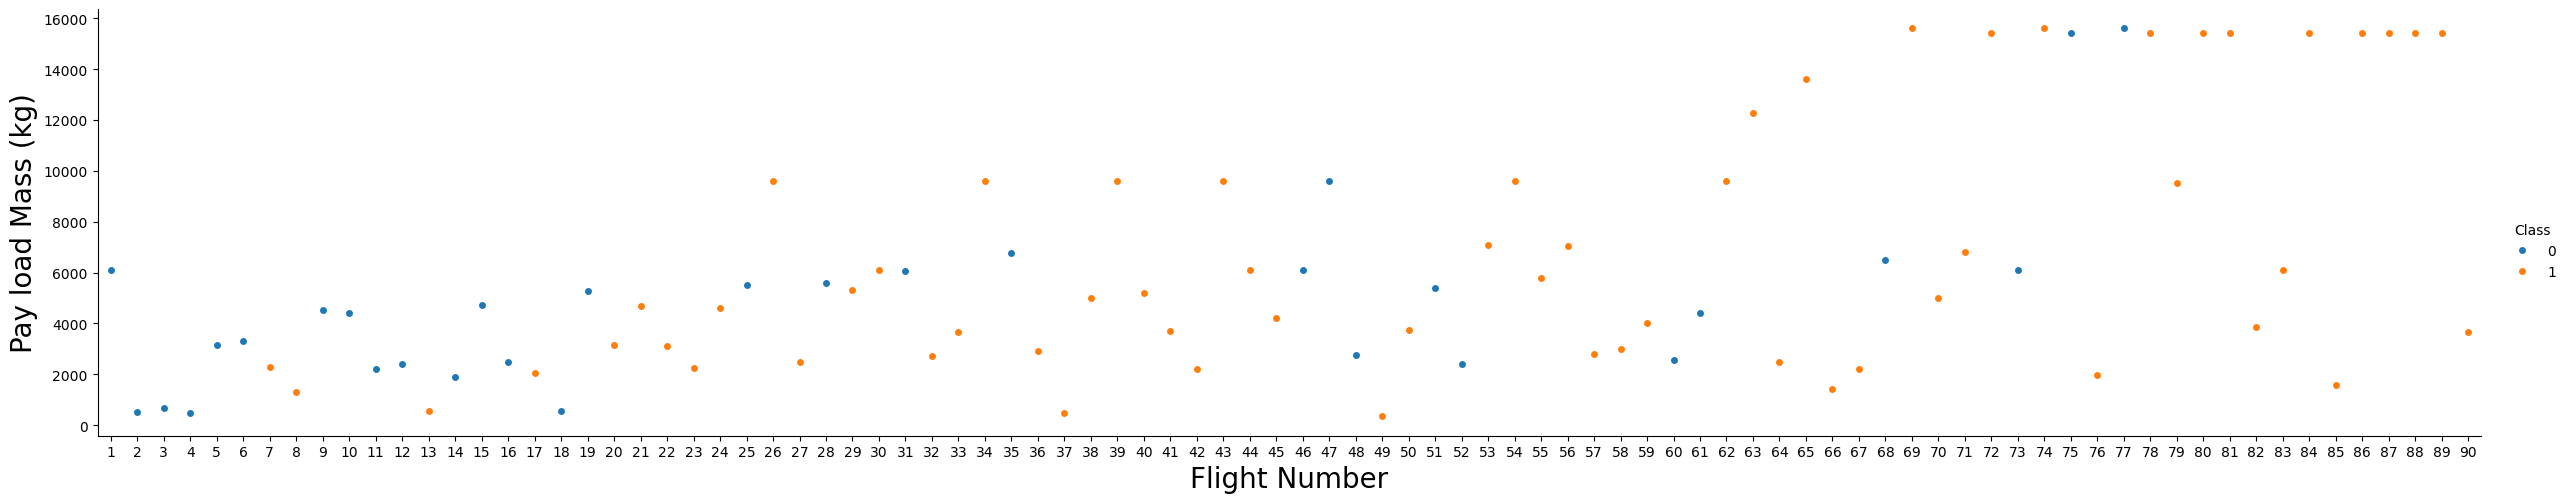

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


# TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


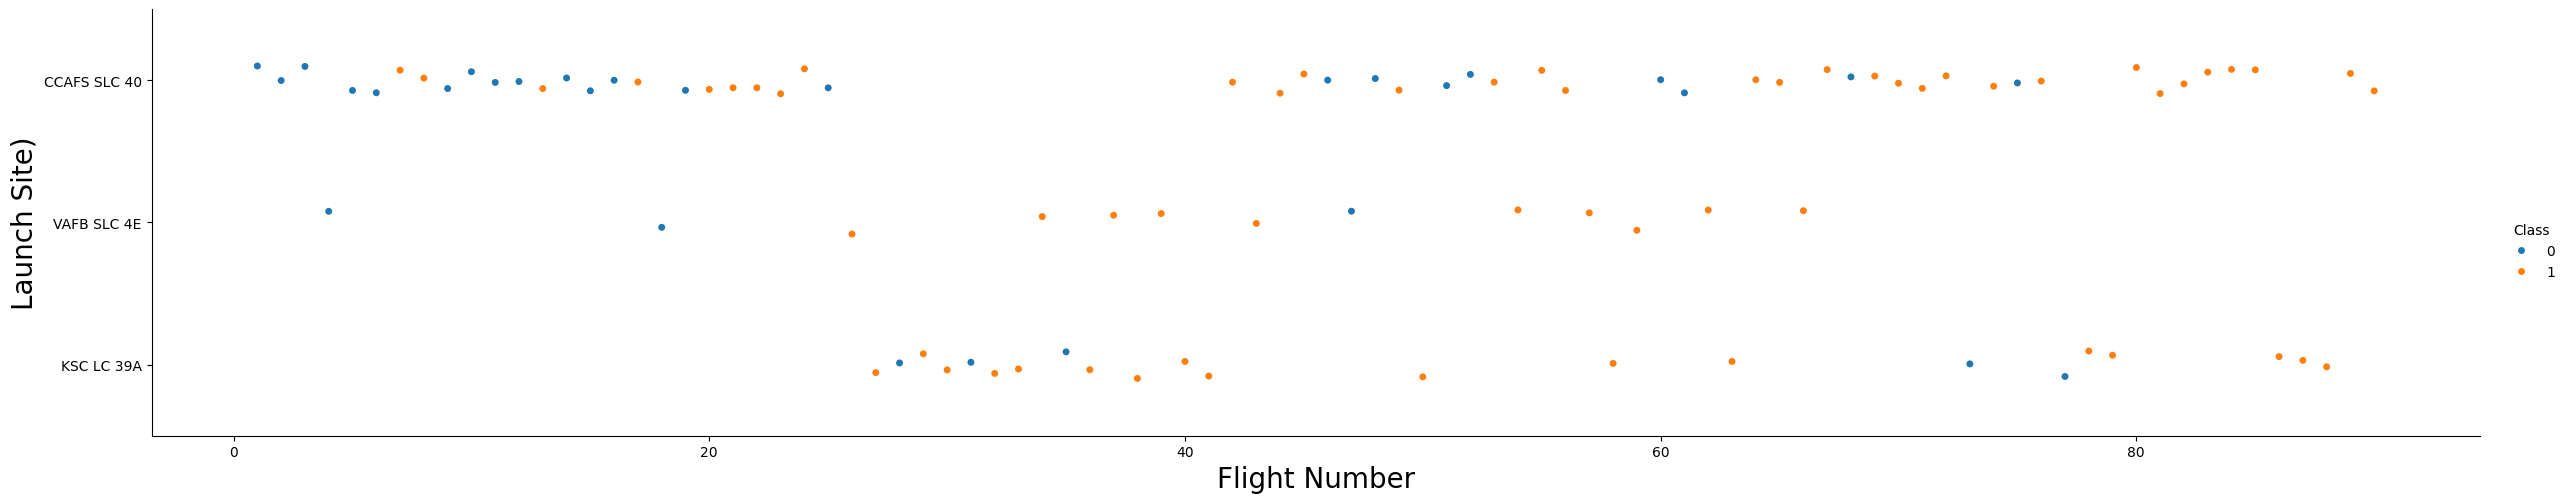

In [8]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site)",fontsize=20)
plt.show()

## Flight Number vs. Launch Site Analysis

Based on the scatter point plot of "Flight Number" vs. "Launch Site" with different hues representing the "Class":

### 1. Launch Sites Distribution:

   - **CCAFS SLC 40**: Predominantly used for earlier flights. Majority of the launches took place here, especially the earlier ones.
   - **KSC LC 39A**: Begins being used around the 30th flight and seems to be the primary site for subsequent flights.
   - **VAFB SLC 4E**: Used the least among the three, with flights scattered intermittently.

### 2. Flight Outcome Trends (Class):

   - **Color Significance**: The plot uses color (hue) to represent outcomes - successes (0) and failures (1).
   - **CCAFS SLC 40 Trends**: Earlier flights (below flight number 20) show a mixture of successes and failures. Failures appear more frequent in the very early stages.
   - **Improved Success Over Time**: Increasing flight numbers show an increase in the success ratio, suggesting better outcomes with time.
   - **KSC LC 39A Trends**: Predominantly show successful flights.
   - **VAFB SLC 4E Trends**: A mix of both, but due to fewer flights, it's challenging to discern a clear pattern.

### 3. Increasing Flight Frequency:

   - With the increase in flight number, the density of data points also seems to rise, indicating potentially more frequent flights in the later stages.

**Conclusion**: Over time, there's a noticeable trend of improving success rates, especially at the KSC LC 39A launch site. While earlier flights at CCAFS SLC 40 had mixed outcomes, later flights, particularly from KSC LC 39A, exhibited a higher rate of success.

# TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


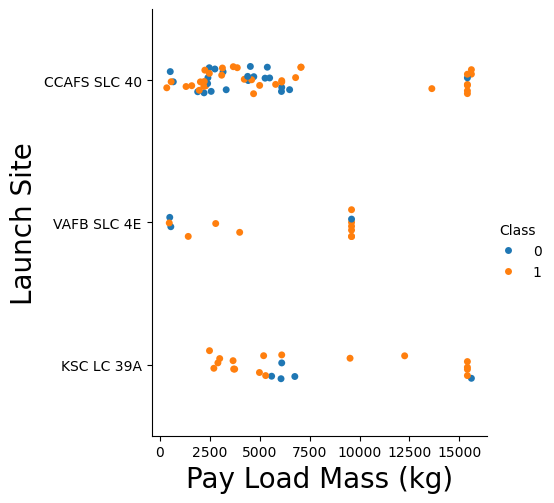

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

## Analysis of "Launch Site" vs. "Pay Load Mass (kg)"

### **Observations**:

1. **CCAFS SLC 40**:
   - The payloads launched from this site cover a wide range of masses, from very light (close to 0 kg) to heavy (close to 15000 kg).
   - The Class 1 and Class 0 points are distributed quite evenly in this range, suggesting a balanced success and failure rate across different payload masses for this launch site.

2. **VAFB SLC 4E**:
   - The data points for this launch site seem to be concentrated in the lower payload mass range, primarily between 0 to 7500 kg.
   - There is a mix of Class 1 and Class 0 points, indicating varied success for lighter payloads.

3. **KSC LC 39A**:
   - The launches from this site are distributed more towards the middle to higher payload mass range.
   - Both Class 1 and Class 0 points are present, suggesting that this site handles a variety of payloads with varied success rates.

### **General Insights**:
   - All three launch sites have witnessed both success (Class 1) and failure (Class 0), with no exclusive success or failure trend observable based on payload mass.
   - CCAFS SLC 40 seems to be the most versatile launch site in terms of handling a wide range of payload masses.

### **Recommendations**:
   - Further analysis might be required to understand other variables or factors affecting the success rate, such as launch vehicle type, weather conditions, or technical specifications of the launch sites.
   - This scatter plot provides a good foundation, but combining it with other data points might give a more comprehensive picture of launch success factors.

# TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


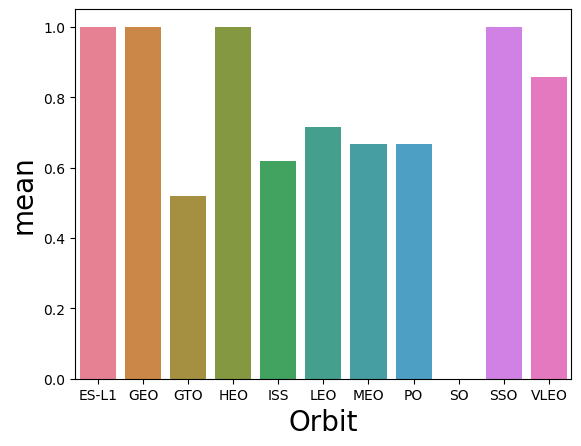

In [20]:
# HINT use groupby method on Orbit column and get the mean of Class column
t = df.groupby(['Orbit'])['Class'].agg(['mean']).reset_index()

sns.barplot(y="mean", x="Orbit", hue="Orbit", data=t)

plt.xlabel("Orbit",fontsize=20)
plt.ylabel("mean",fontsize=20)
plt.show()

## Analysis of Success Rate by Orbit

### **Observations**:

1. **High Success Rate Orbits (>0.8)**:
   - **ES-L1**: This orbit has a success rate very close to 1, indicating nearly all missions to this orbit were successful.
   - **VLEO**: Another orbit with an almost perfect success rate.
   - **SSO**: Also demonstrates a very high success rate.

2. **Moderate Success Rate Orbits (0.4 to 0.8)**:
   - **GEO**: Has a success rate slightly above 0.8.
   - **ISS**: Its success rate is slightly above 0.6.
   - **LEO**: Has a success rate slightly above 0.6, similar to ISS.
   - **MEO** & **PO**: Both have success rates hovering around 0.6.
   - **SO**: Slightly below 0.6.

3. **Low Success Rate Orbits (<0.4)**:
   - **GTO**: Its success rate is just above 0.4, making it the lowest among the displayed orbits.
   - **HEO**: While it's above 0.5, it's still on the lower side compared to many other orbits.

### **Insights**:
   - Orbits like ES-L1, VLEO, and SSO demonstrate significantly high success rates, making them reliable destinations for missions.
   - On the other hand, GTO might require more attention or analysis to understand the challenges causing a lower success rate.
   
### **Recommendations**:
   - For organizations or missions prioritizing success rates, considering orbits like ES-L1, VLEO, or SSO might be beneficial.
   - Additional data and factors might help in understanding the challenges faced in orbits like GTO and formulating strategies to improve success rates.

# TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


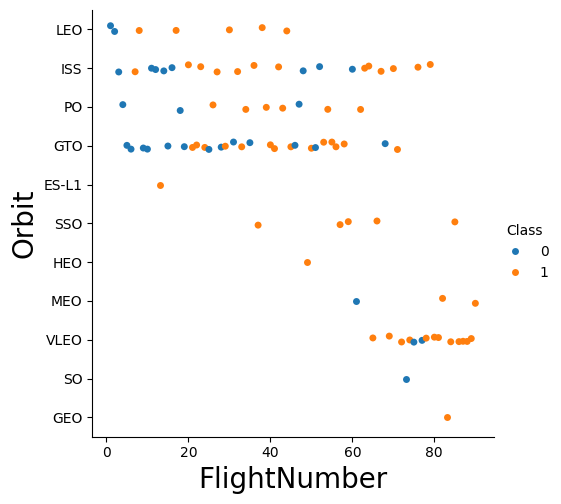

In [21]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

## Analysis of Relationship between FlightNumber and Orbit type

### **Observations**:

1. **LEO (Low Earth Orbit)**:
   - A high concentration of flights spanning across various flight numbers.
   - Appears to have a mixed distribution of successful (Class 1) and unsuccessful (Class 0) flights.

2. **ISS (International Space Station)**:
   - Flights are densely packed in the middle range of flight numbers.
   - Predominantly successful missions.

3. **GTO (Geostationary Transfer Orbit)**:
   - Flights are spread across various flight numbers but less densely than LEO.
   - Mixed results in terms of success.

4. **Other Orbits (e.g., ES-L1, SSO, HEO, MEO, VLEO, SO, GEO)**:
   - Lesser number of flights as compared to LEO, ISS, and GTO.
   - VLEO (Very Low Earth Orbit) has a concentrated cluster of successful flights in the higher flight number range.

### **Insights**:
   - **Improvement Over Time**: Orbits like ISS and GTO show a trend where earlier flights had more failures, but there seems to be a trend of increased success in the recent flights, indicating technological advancements or improved mission strategies over time.

   - **Orbits with High Success Rate**: VLEO and ES-L1 predominantly show successful flights. This could imply that these orbits might be less challenging, or the technology and strategies for these orbits have been well-refined.

   - **Mixed Results**: Orbits like LEO, PO, and SO show a mix of successes and failures without a clear pattern, suggesting varying challenges or mission-specific factors affecting the outcomes.

   - **Orbits with Limited Data**: Orbits like HEO, MEO, and GEO have very few flights, making it challenging to determine a clear trend.

# TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


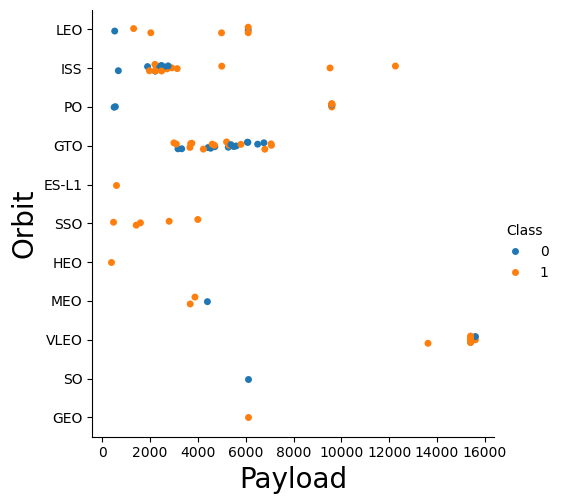

In [22]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

## Analysis of Relationship between Payload and Orbit type

### **Observations**:

1. **LEO (Low Earth Orbit)**:
   - A wide range of payloads, from light to heavy.
   - Appears to have a mixed distribution of successful (Class 1) and unsuccessful (Class 0) flights.

2. **ISS (International Space Station)**:
   - Payloads are concentrated in the mid-range, with a clear cluster of successful flights.

3. **GTO (Geostationary Transfer Orbit)**:
   - Predominantly mid-range payloads.
   - A mix of successful and unsuccessful flights, but with a noticeable cluster of successful flights for certain payload values.

4. **Other Orbits (e.g., ES-L1, SSO, HEO, MEO, VLEO, SO, GEO)**:
   - These orbits have fewer data points in comparison to LEO, ISS, and GTO.
   - Most of these orbits tend to handle mid-range to lighter payloads.
   - VLEO (Very Low Earth Orbit) shows successful flights with higher payloads.
   - GEO (Geostationary Orbit) shows only a few flights, but with a wide range of payloads and mixed success.

### **Insights**:
   - In general, while the success of a mission (Class 1 vs Class 0) doesn't show a direct correlation with the payload's weight, certain orbits like ISS and GTO have noticeable clusters of successful flights for specific payload ranges.


# TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [23]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


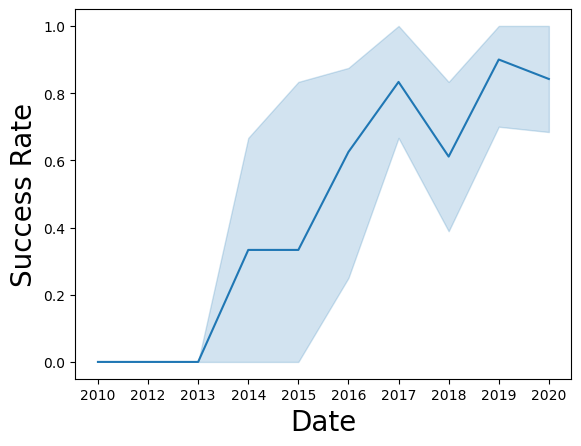

In [25]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(data=df, x="Date", y="Class")
plt.xlabel("Date",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

## Analysis of Launch success yearly trend

### **Observations**:
   - There is a notable **increase in the success rate** from 2010 to 2017, with the rate rising from close to 0% to nearly 100%.
   - The success rate reached its peak in 2017.
   - Post-2017, there was a slight drop and the success rate began to **fluctuate**. However, it remained relatively high, with rates typically above 60%.
   - The period from 2018 to 2020 showed a more **stable success rate** with minor fluctuations.

### **Insights**:
   - Efforts made between 2010 to 2017 seem to have significantly improved the success rate of launches. This could be attributed to technological advancements, better preparation, or more rigorous testing.
   - While 2017 was a landmark year, there may have been certain challenges or changes in the subsequent years that caused the rate to not remain at the peak.
   - The stability in success rates post-2018 suggests that the industry may have reached a certain standard or maturity in their launch protocols, leading to consistent performance.
   - It would be interesting to investigate further the specific changes or challenges that occurred between 2017 and 2018, leading to the observed fluctuations.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
